<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Hough_Transform_(HT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hough Transform (HT):**
<p justify = 'align'> A powerful technique used for detecting specific shapes in an image, such as lines, circles, and ellipses. However, it is not a direct replacement for edge detection algorithms like Canny or Sobel, as it serves a different purpose.

Here’s a quick comparison:

###**Canny Edge Detection:**

**Purpose:** Detects edges by finding areas of rapid intensity change.

**Strengths:** Good for general-purpose edge detection.
Provides binary output with clear edges.
Can be fine-tuned using thresholds.

**Limitations:**
* Sensitive to noise.
* Does not detect the shapes but only the edges.

###**Sobel Edge Detection:**

**Purpose:** Calculates gradients in the image to highlight areas of high spatial frequency, which correspond to edges.

**Strengths:** Simple and effective for detecting edges.
Provides gradient information (direction and magnitude).

**Limitations:**
* May not provide as sharp edges as Canny.
* More sensitive to noise.


###**Hough Transform (HT):**
**Purpose:** Detects shapes like lines, circles, or ellipses by voting in a parameter space.

**Strengths:** Ideal for detecting specific shapes (e.g., circles, straight lines).
Can detect shapes even in noisy images.

**Limitations:**
* Computationally intensive, especially for complex shapes.
* Requires prior knowledge of the shapes to detect.
* Not useful for general edge detection, as it focuses on specific geometries.


**Which to Use?**

* For General Edge Detection: Stick with Canny or Sobel.
* For Shape Detection: Use Hough Transform.
* Line Detection: Hough Line Transform.
* Circle Detection: Hough Circle Transform.

**When to Consider Hough Transform:**

<p align = 'justify'> If your goal is to detect specific shapes like straight fibers or circular features in the image, Hough Transform could be beneficial. However, if you’re more interested in general edge detection for further processing (like skeletonization), Sobel or Canny might be more appropriate.

**Hybrid Approach:**

You can combine Canny or Sobel with Hough Transform:

**Step 1:** Use Sobel or Canny to detect edges.

**Step 2:** Apply Hough Transform to detect specific shapes within the edge-detected image.

<p align = 'justify'> If you're working with well-defined shapes like straight fibers, applying Hough Transform after edge detection could enhance detection quality and provide more reliable measurements.

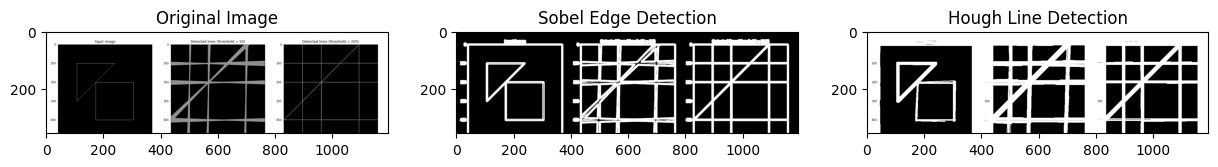

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

def apply_sobel_and_hough(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img[:-65, :]
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Sobel edge detection
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # Sobel X
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Y
    sobel_edges = np.sqrt(sobelx**2 + sobely**2)  # Magnitude of gradient

    # Normalize to 8-bit image
    sobel_edges = cv2.convertScaleAbs(sobel_edges)

    # Apply Hough Line Transform
    lines = cv2.HoughLinesP(sobel_edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Create an image to draw the lines
    line_image = np.copy(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return img, sobel_edges, line_image

# Usage
image_path = '/content/shapes_transform.png'

original_img, sobel_edges_img, hough_lines_img = apply_sobel_and_hough(image_path)

# Display the original, Sobel edge-detected, and Hough line-detected images
plt.figure(figsize=(15, 15))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Image")

# Sobel Edge Detection
plt.subplot(1, 3, 2)
plt.imshow(sobel_edges_img, cmap='gray')
plt.title("Sobel Edge Detection")

# Hough Line Detection
plt.subplot(1, 3, 3)
plt.imshow(hough_lines_img, cmap='gray')
plt.title("Hough Line Detection")

plt.show()

**Explanation:**

**Sobel Edge Detection:**

<p align = 'justify'> The image is first blurred using a Gaussian filter to reduce noise. Then Sobel edge detection is applied to detect gradients in both the X and Y directions. The magnitude of these gradients represents the edges in the image.

**Hough Line Transform:**

After detecting edges with Sobel, the Hough Line Transform (cv2.HoughLinesP) is used to detect straight lines in the edge-detected image.

This method requires a few parameters:

* rho: Distance resolution of the accumulator in pixels.
* theta: Angle resolution of the accumulator in radians.
* threshold: Minimum number of intersections in the Hough space to consider a line.
* minLineLength: Minimum length of a line to be accepted.
* maxLineGap: Maximum allowed gap between line segments to treat them as a single line.

Detected lines are drawn on the image.

**Visualization:**

The original image, the Sobel edge-detected image, and the image with detected lines are displayed side by side for comparison.

**Considerations:**

**Shape-Specific Detection:** If your goal is to detect straight lines (like fibers), this method can be highly effective.

**Thresholds:** Adjust the Hough Transform parameters to fine-tune the detection for your specific application.

<p align = 'justify'> This approach is particularly useful when you're dealing with images where fibers are aligned in a straight manner. If the fibers or features in your images are curved or irregular, you might need to consider using a more complex shape detection method or combine this with other techniques.

#**Hough Transform in image Processing**

<p align = 'justify'> The Hough Transform (HT) is an integral feature extraction technique in image processing and computer vision, essential for detecting simple geometric shapes like lines, circles, and ellipses in images. It is especially effective in identifying distorted, incomplete, or partially obscured shapes, making it invaluable when traditional edge detection methods fall short. The HT operates by transforming image space into parameter space, enabling the detection of shapes through pattern identification in this transformed space.

<p align = 'justify'> The HT uses a voting mechanism in the parameter space to highlight potential object candidates. This approach is beneficial for handling image noise and dealing with incomplete feature boundaries, making it a robust tool in various applications like medical imagery and manufactured part analysis. While the classical HT focuses on standard curves and is computationally less intensive, the generalized HT caters to more complex shapes where simple analytic descriptions are not feasible.

<p align = 'justify'> This article delves into the workings of the Hough Transform, detailing its mathematical foundation, advantages, limitations, and diverse applications in image analysis.

**History**

<p align = 'justify'> The Hough transform was first proposed by Paul Hough in 1962 as a method for detecting lines in images. It was later extended to detect other shapes like circles and ellipses. The technique has since been widely used in image processing applications, particularly in the areas of computer vision and pattern recognition.

**What is Hough Transform?**

<p align = 'justify'> The Hough transform in image processing is a technique used to detect simple geometric shapes in images. It works by transforming the image space into a parameter space, where the geometric shapes can be detected through the identification of patterns in the parameter space.

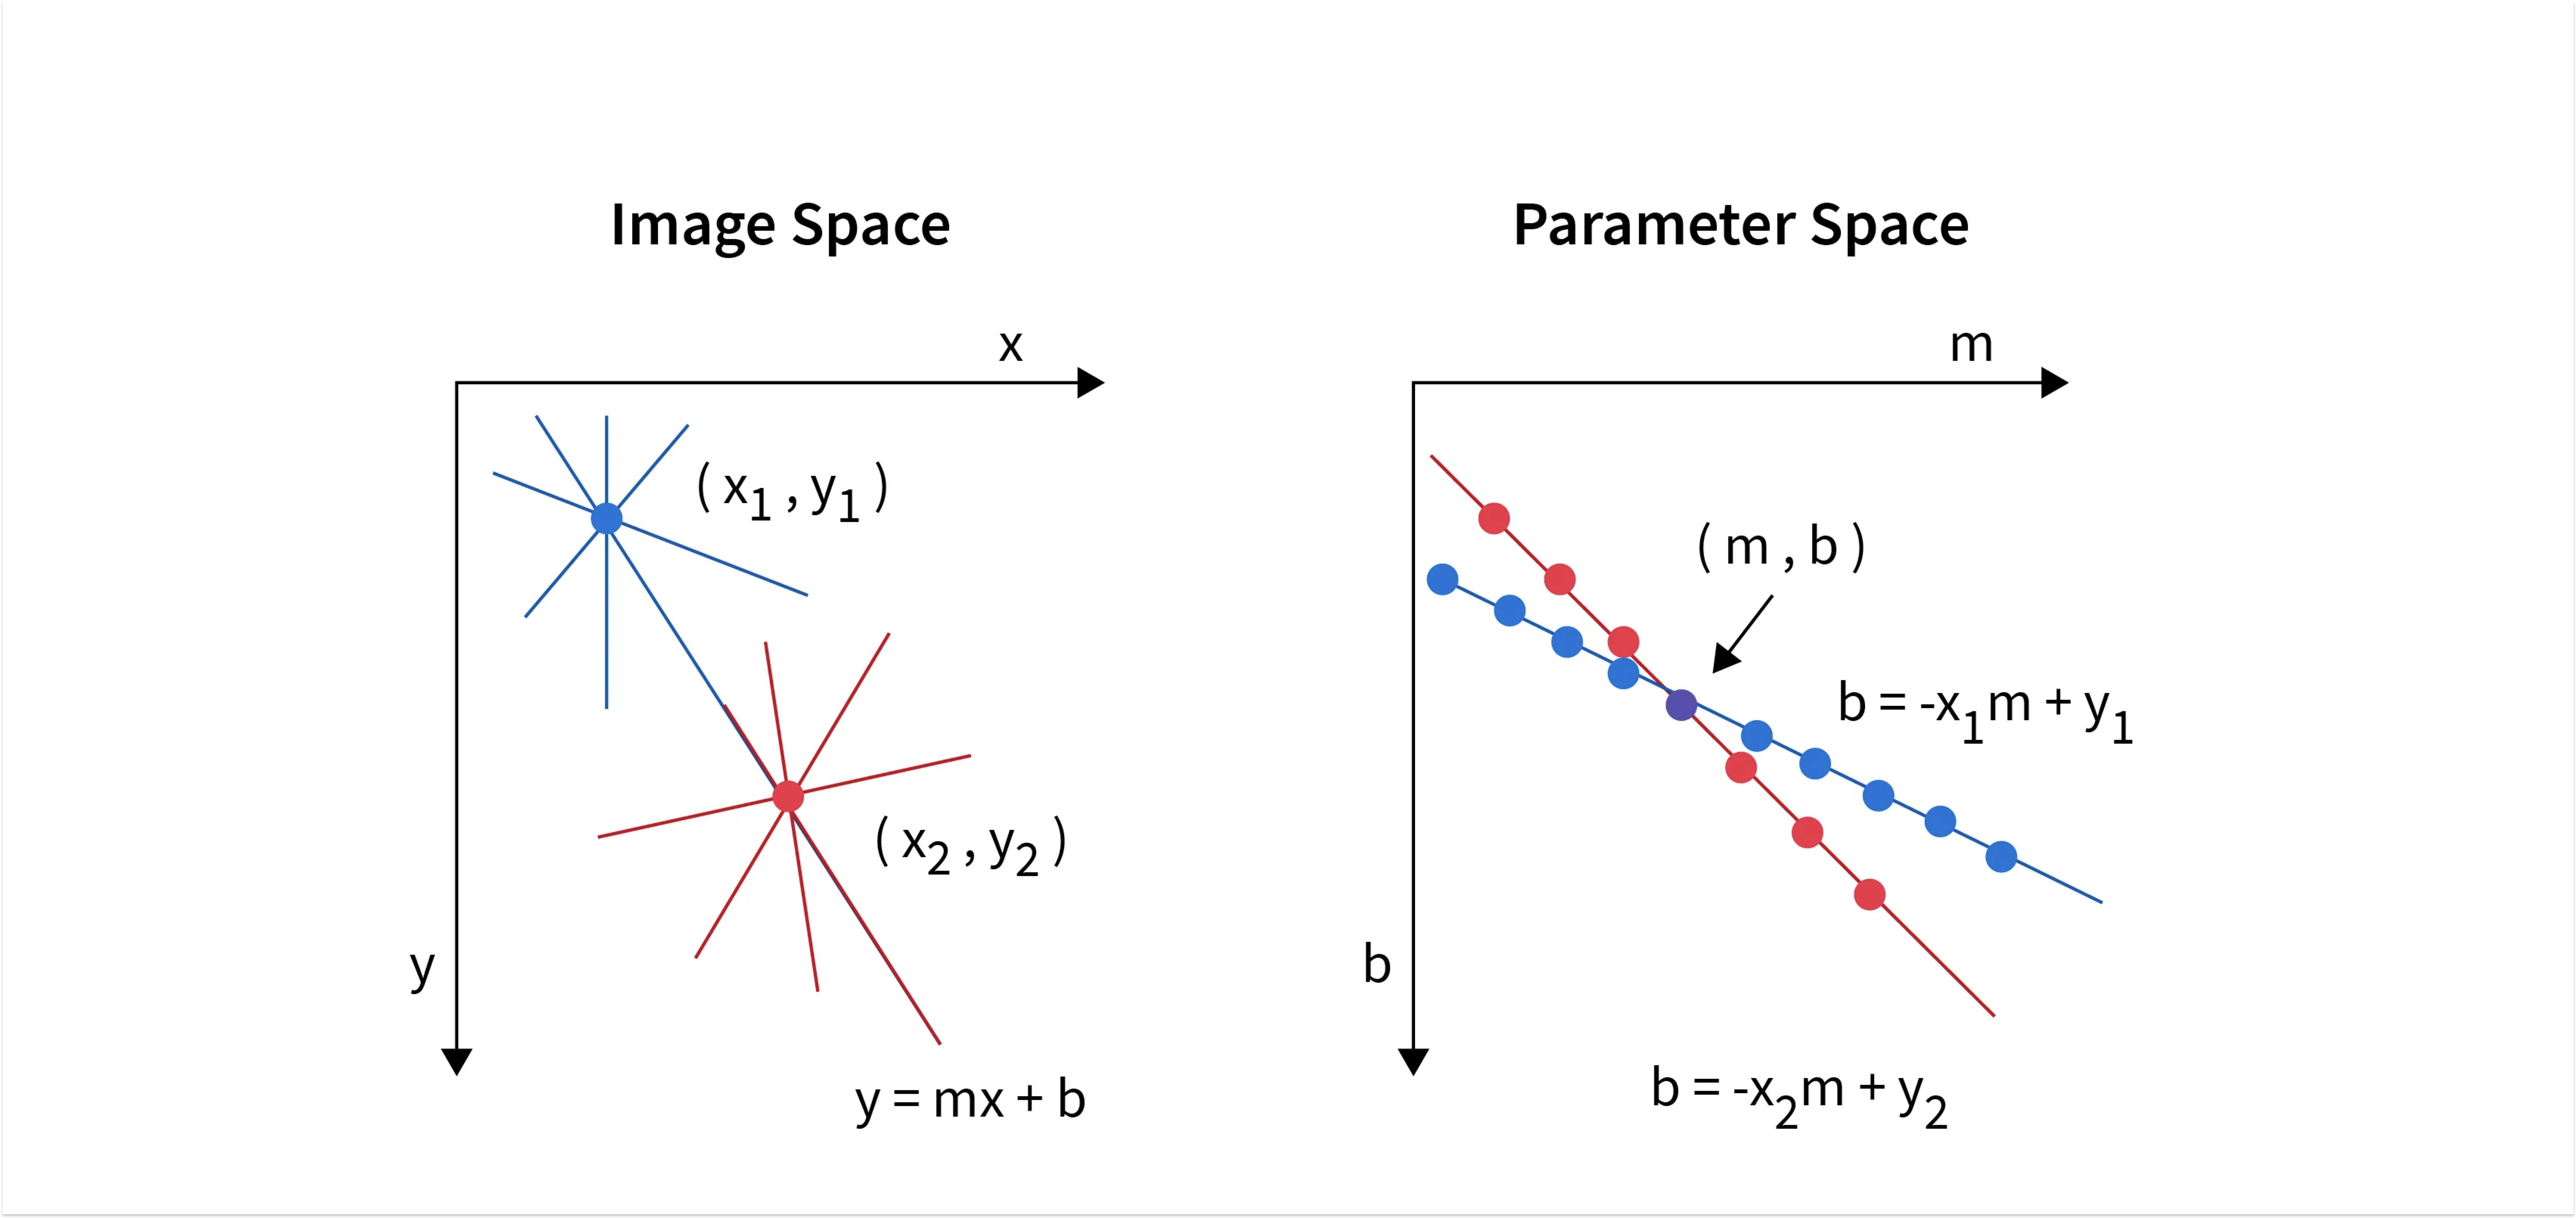

**Need of Hough Transform**

<p align = 'justify'> The Hough transform is needed because traditional image processing techniques like edge detection and thresholding are not always effective at detecting simple geometric shapes in images. These techniques can be particularly ineffective when the shapes are distorted, incomplete, or partially obscured. The Hough transform can detect these shapes by transforming the image space into a parameter space where the shapes can be more easily identified.



###**Algorithm**

**Line Detection:**
- <p align = 'justify'> For detecting lines, the standard Hough Transform maps each point in the image to a sinusoidal curve in the parameter space, where each point on this curve represents a possible line in the image.
- <p align = 'justify'> The parameter space typically uses the polar coordinate system (r, θ), where r is the distance from the origin to the closest point on the line, and θ is the angle between the x-axis and the line perpendicular to the line in the image.
- <p align = 'justify'> By accumulating votes in the parameter space for each point and curve, the most voted parameters indicate the presence of a line.

**Circle Detection:**
- <p align = 'justify'> For circles, the Hough Transform can be extended by using a parameter space defined by the circle's center (a, b) and radius r.
- <p align = 'justify'> Each edge point in the image contributes to multiple possible circles in the parameter space, and the intersection of these possibilities indicates the presence of a circle.

**Steps Involved in Line Detection:**
1. Edge Detection:

* <p align = 'justify'> First, an edge detection algorithm (like Canny) is applied to the image to find significant edges.

2. Mapping Points to Parameter Space:

* <p align = 'justify'> Each point in the edge-detected image is mapped to the parameter space (r, θ).
A sinusoidal curve is drawn for each point, representing all possible lines that could pass through that point.

3. Accumulation:

* <p align = 'justify'> An accumulator array is created where each cell represents a specific (r, θ) combination.
For each point in the image, the corresponding sinusoidal curves increment the values in the accumulator array.

4. Finding Peaks in Accumulator:

* <p align = 'justify'> Peaks in the accumulator array indicate potential lines in the original image space.
These peaks are translated back into line equations in the image space.



##**Guidelines for Use**

Here are some general guidelines for using the Hough transform:

1. <p align = 'justify'> Preprocess the image: Before applying the Hough transform, it is recommended to preprocess the image to reduce noise, enhance edges, and improve contrast. Common preprocessing techniques include filtering, thresholding, and edge detection.
2. <p align = 'justify'> Choose the appropriate variant: The Hough transform has several variants, and the choice of variant depends on the shape being detected, the level of noise in the image, and the computational resources available. It is important to choose the appropriate variant of the Hough transform for the specific application.
3. <p align = 'justify'> Select parameters carefully: The Hough transform involves selecting several parameters, such as the threshold value, the minimum line length, and the maximum gap between line segments. It is important to select these parameters carefully to achieve the desired level of accuracy and efficiency.
4. <p align = 'justify'> Use multiple scales: If the shape being detected varies in size, it may be useful to use a multi-scale Hough transform that detects shapes at different scales.
5. <p align = 'justify'> Combine with other techniques: The Hough transform can be combined with other image processing techniques, such as template matching, machine learning, or feature extraction, to improve the accuracy and efficiency of shape detection.
6. <p align = 'justify'>Validate the results: The Hough transform can sometimes produce false positives or false negatives, especially in noisy or complex images. It is important to validate the results of the Hough transforms using additional techniques, such as human inspection or additional image analysis methods.

By following these guidelines, the Hough transform can be a powerful tool for detecting shapes and structures in images.

##**Common Variants**

1. **<p align = 'justify'> Probabilistic Hough Transform (PHT):** The PHT is a variant of the Hough transform that randomly samples a subset of points from the input image and uses these points to detect simple geometric shapes. The PHT can be faster than the standard Hough transform and is particularly useful for detecting lines in noisy images.

2. **<p align = 'justify'> Multi-Scale Hough Transform (MSHT):** The MSHT is a variant of the Hough transform that detects shapes at multiple scales by transforming the image space into multiple parameter spaces. The MSHT is particularly useful for detecting shapes that vary in size and shape.

3. **<p align = 'justify'> Generalized Hough Transform (GHT):** The GHT is a variant of the Hough transform that can be used to detect arbitrary shapes, not just simple geometric shapes. The GHT works by defining a reference shape and then detecting occurrences of that shape in the input image.

4. **<p align = 'justify'> Gradient Hough Transform (GHT):** The GHT is a variant of the Hough transform that uses gradient information in the image to detect edges and corners. The GHT is particularly useful for detecting complex shapes that contain multiple edges and corners.

5. **<p align = 'justify'> Radon Transform (RT):** The RT is a variant of the Hough transform that is used to detect straight lines in images. The RT works by projecting the image along different angles and then detecting the presence of straight lines in the resulting projections.

<p align = 'justify'> These variants of the Hough transform can be used in combination with each other or with other image processing techniques to detect a wide range of shapes and structures in images.

###**Advantages**

* <p align = 'justify'> The Hough transform is a robust technique for detecting simple geometric shapes in images, even when they are distorted, incomplete, or partially obscured.

* <p align = 'justify'> It is a versatile technique that can be applied to detect lines, circles, ellipses, and other simple shapes.
* <p align = 'justify'> The technique is relatively easy to implement and can be applied to a wide range of image processing applications.
* <p align = 'justify'> The Hough transform is computationally efficient and can be used to process large datasets.
* <p align = 'justify'> The technique is invariant to scale, rotation, and translation of the image, making it useful for object recognition applications.
Disadvantages

* <p align = 'justify'> The Hough transform can be sensitive to noise in the image, which can lead to false positives and false negatives.

**<p align = 'justify'> Example:** Let's say we have an image with a few horizontal lines, and we want to detect them using the Hough transform. However, the image also contains some random noise that appears as small, sporadic dots.

<p align = 'justify'> When we apply the Hough transform to the image, the noise may create false maxima in the Hough space, leading to false positive detections of lines that don't exist in the image. On the other hand, the noise can also cause the true maxima of the Hough space to be suppressed, leading to false negatives where actual lines are missed in the detection process.

<p align = 'justify'> Therefore, it is important to preprocess the image to reduce the noise before applying the Hough transform to improve the accuracy of line and curve detection.

*The technique can be computationally expensive, especially for large datasets or complex shapes.*

<p align = 'justify'> This is especially true for large datasets or complex shapes, where the parameter space can become very large, requiring a significant amount of time and resources to process. In particular, the Hough transform can be computationally expensive for images with a high-resolution, as the number of points in the parameter space scales with the number of pixels in the image.

<p align = 'justify'> Additionally, the Hough transform is not very efficient at detecting curves with varying shapes, as these require more complex parameterizations that can lead to a more expensive parameter space.

<p align = 'justify'> The accuracy of the Hough transform depends on the choice of parameters, which can be challenging to select for complex shapes or images with a high degree of variability.

 <p align = 'justify'> The Hough transform is limited to detecting simple geometric shapes and may not be effective for more complex shapes or structures.

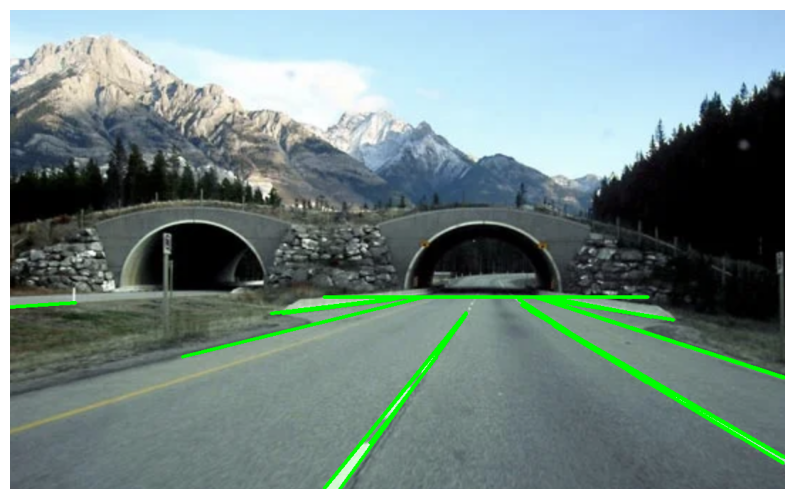

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Highway.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define a region of interest (ROI)
height, width = edges.shape
mask = np.zeros_like(edges)

# Define a polygon (triangle) that covers the bottom half of the image
polygon = np.array([[
    (0, height),
    (width, height),
    (width, int(height * 0.6)),
    (0, int(height * 0.6))
]], np.int32)

# Fill the polygon with white
cv2.fillPoly(mask, polygon, 255)

# Mask the edges image
masked_edges = cv2.bitwise_and(edges, mask)

# Hough Line Transform to detect lines
lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=150)

# Draw the lines on the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


**Application Areas:**
- <p align = 'justify'> Lane Detection in Autonomous Vehicles: The algorithm is widely used in detecting lane markings on roads.
- <p align = 'justify'> Document Analysis: Detecting straight lines in documents for segmenting text or tables.
- <p align = 'justify'> Shape Detection in Robotics: For identifying specific shapes and objects in robotic vision systems.

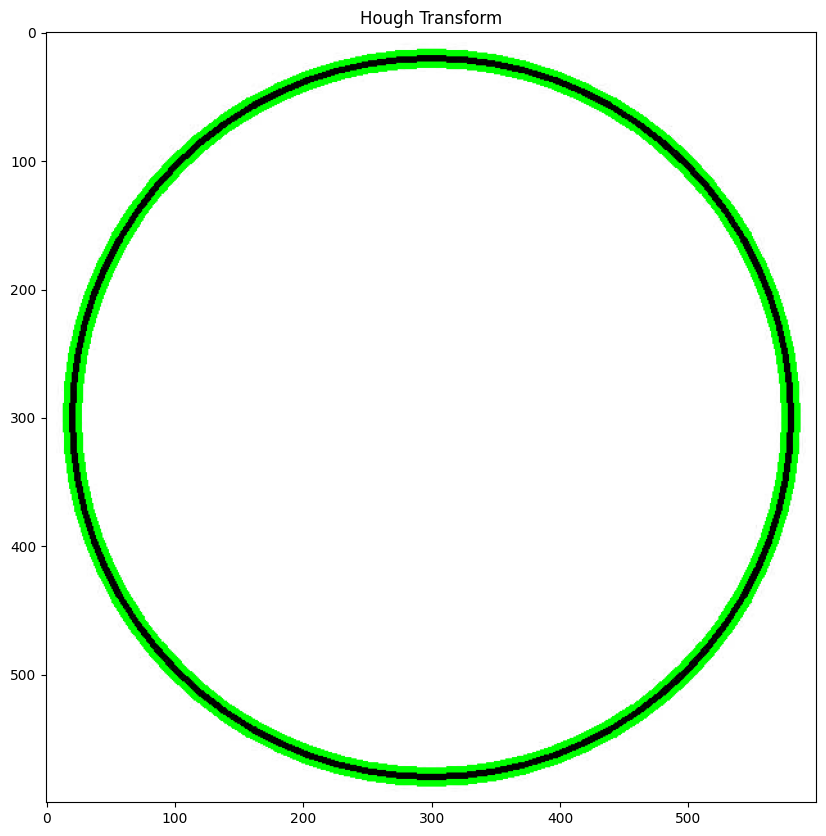

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('/content/Circle.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur with different kernel sizes
blurred_images = [cv2.GaussianBlur(gray, (k, k), 0) for k in [3, 9]]

# Apply Hough transform for circle detection
for gray_blur in blurred_images:
    circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=70,
                               param1=30, param2=40, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype('int')
        for (x, y, r) in circles:
            cv2.circle(img, (x, y), r, (0, 255, 0), 3)

# Show result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform")
plt.show()